In [ ]:
import pyhht
from matplotlib import pyplot as plt
import scipy
from scipy.integrate import quad
import numpy as np
from pyhht.visualization import plot_imfs
from pyhht import EMD
from scipy.signal import hilbert

In [10]:
"""
#complex integral

 def complex_quadrature(func, a=0, b=scipy.infty, **kwargs):#a,lower limit 
     def real_func(x):
         return scipy.real(func(x))
     def imag_func(x):
         return scipy.imag(func(x))
     real_integral = quad(real_func, a, b, **kwargs)
     imag_integral = quad(imag_func, a, b, **kwargs)
     return (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
   # the later two terms are absolute errors.

#complex_quadrature(lambda x: (scipy.exp(1j*x)), 0,scipy.pi/2)
"""

2
3


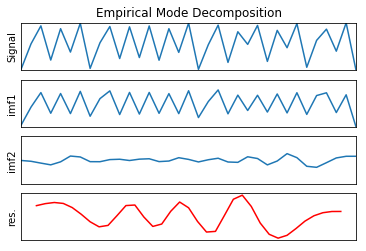

2
3


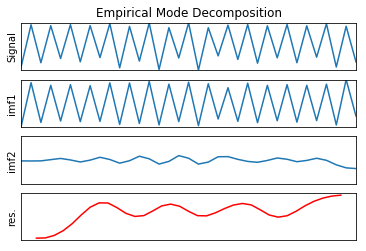

In [201]:
def two_species(T=35):
    x,y=np.zeros(T),np.zeros(T)
    x[0],y[0]=0.2,0.4
    for i in range(1,T):
        x[i]=x[i-1]*(3.8-3.8*x[i-1]-0.02*y[i-1])
        y[i]=y[i-1]*(3.5-3.5*y[i-1]-0.1*x[i-1])
    return x,y

X,Y=two_species()
t = np.linspace(0, 1, 35)

Ximfs=EMD(X,n_imfs=3).decompose()[:-1]
Yimfs=EMD(Y).decompose()[:-1]

plot_imfs(X, Ximfs, t)
plot_imfs(Y, Yimfs, t)


In [ ]:
#remove one of the imf and redo the imf decomposition


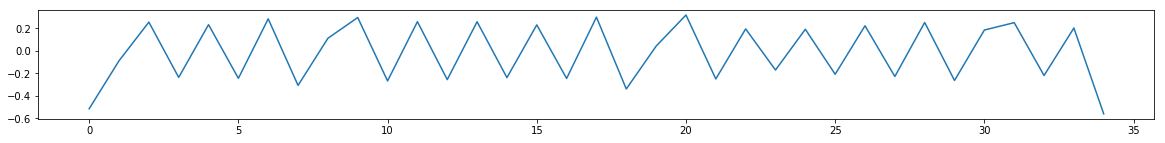

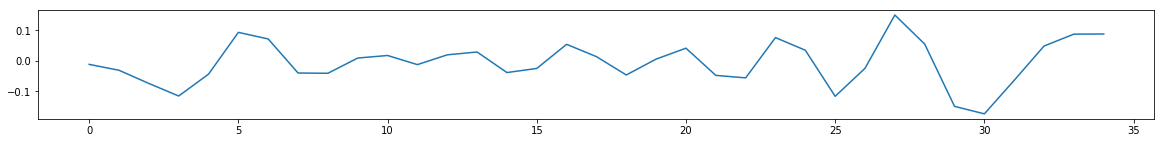

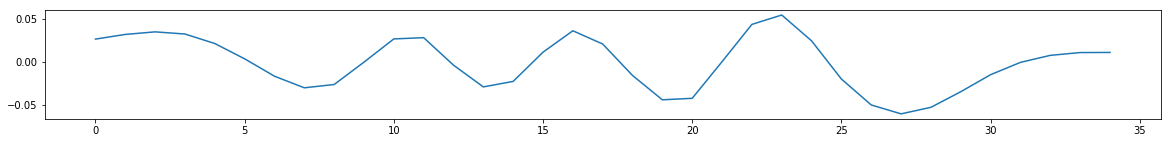

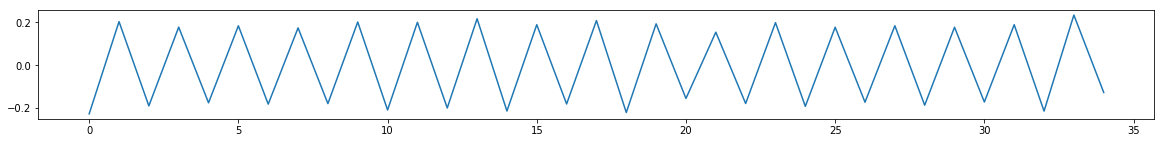

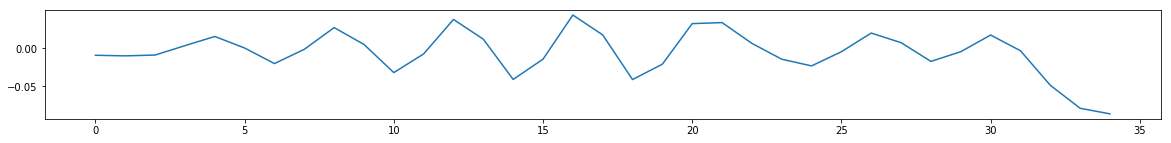

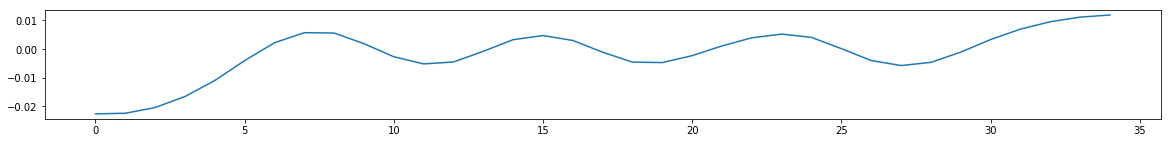

In [202]:
for ximf in Ximfs:
    plt.figure(figsize=(20,2))
    plt.plot(ximf)
    plt.show()
for yimf in Yimfs:
    plt.figure(figsize=(20,2))
    plt.plot(yimf)
    plt.show()

In [189]:
def coh(Ximfs,Yimfs):
    S_xh,S_yh=[],[]
    for ximf in Ximfs:
        S_xh.append(hilbert(ximf))
    for yimf in Yimfs:
        S_yh.append(hilbert(yimf))
    S_xh=np.imag(np.array(S_xh))
    S_yh=np.imag(np.array(S_yh))
    S_x,S_y=X,Y
    A_x = (S_xh**2+S_x**2)**0.5
    A_y = (S_yh**2+S_y**2)**0.5
    
    phi_x=np.arctan(S_xh/S_x)
    phi_y=np.arctan(S_yh/S_y)
    dphi = phi_y - phi_x
    
    return 1/t.shape[0]*(np.sum(dphi,axis=1)) 

In [203]:
varx = coh(Ximfs,Ximfs)
vary = coh(Yimfs,Yimfs)
w = varx*vary/np.sum(varx*vary)

In [206]:
w

array([-1.52643941,  2.45805488,  0.06838453])

In [207]:
cohxy=coh(Ximfs,Yimfs)
cohxy

array([-0.02197388, -0.02965389,  0.00408384])

In [204]:
Y_prime = -(-Y+Yimfs) #(3,35)
X_prime = -(-X+Ximfs) #(3,35)

In [210]:
X_prime

array([[0.71674255, 0.6972226 , 0.64415022, 0.58187158, 0.62114258,
        0.71892619, 0.65744701, 0.51766896, 0.51406466, 0.59261351,
        0.63769709, 0.62423539, 0.64196445, 0.6392464 , 0.58118259,
        0.62288498, 0.71521477, 0.64452166, 0.53449441, 0.5519038 ,
        0.59295448, 0.55755729, 0.60890403, 0.77011649, 0.71477089,
        0.53212891, 0.60373131, 0.77333816, 0.68443727, 0.49233743,
        0.47961146, 0.59556986, 0.70855317, 0.74507348, 0.74252781],
       [0.21264635, 0.63846371, 0.97233274, 0.46030701, 0.89617182,
        0.38005161, 0.86838485, 0.24933177, 0.6651059 , 0.87805856,
        0.35148801, 0.89446293, 0.36524588, 0.86730458, 0.38042051,
        0.87726301, 0.41436735, 0.92869023, 0.24095283, 0.58662034,
        0.86822638, 0.35451021, 0.85848698, 0.52181833, 0.87021928,
        0.43952208, 0.84955391, 0.39336617, 0.87965943, 0.37732057,
        0.83757837, 0.90875792, 0.43930008, 0.85866971, 0.09297464],
       [0.17383703, 0.57482614, 0.86231177, 0.

In [219]:
Y_prime.shape
EMD(Y_prime[0],n_imfs=3).decompose()[:-1]#only two imf

array([[-0.00956409, -0.01032763, -0.00927829,  0.00295067,  0.01490378,
        -0.0001094 , -0.02037873, -0.00181659,  0.02646726,  0.00451733,
        -0.0321202 , -0.00777058,  0.03706845,  0.01133434, -0.04102871,
        -0.01460121,  0.04283313,  0.01694641, -0.04117345, -0.02114615,
         0.03161882,  0.03297026,  0.00593995, -0.0146906 , -0.02341805,
        -0.00492952,  0.01936305,  0.00683461, -0.0175419 , -0.00492578,
         0.01677692, -0.00368536, -0.0485936 , -0.07858049, -0.08584032],
       [-0.02261652, -0.0224166 , -0.02040723, -0.01657547, -0.01097574,
        -0.00405134,  0.00219886,  0.00569961,  0.00558988,  0.00187347,
        -0.00270224, -0.00517983, -0.00452039, -0.00077659,  0.00326646,
         0.00470663,  0.00298558, -0.00110862, -0.00457277, -0.00472024,
        -0.00229258,  0.00109024,  0.00392747,  0.00521805,  0.00405738,
         0.00013954, -0.00401954, -0.00575581, -0.00464602, -0.00107762,
         0.00332124,  0.0069439 ,  0.00952755,  0.

In [217]:
Coh_xyp = []
for i in range(Y_prime.shape[0]):
    y_prime_imfs = EMD(Y_prime[i],n_imfs=3).decompose()[:-1]
    Coh_xyp.append(coh(Ximfs[i],y_prime_imfs))
                  
Coh_xyp = np.array(Coh_xyp)
Coh_xyp

IndexError: tuple index out of range